In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree 

In [7]:
df= pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
x= df[["sepal_length","sepal_width","petal_length","petal_width"]]
y= df["species"]

In [26]:
num_samples = df.shape[0]
print("Number of samples in the dataset:", num_samples)


Number of samples in the dataset: 150


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [20]:
import numpy as np
x_train_reshaped = np.reshape(x_train, (-1, 1))

In [21]:
model=DecisionTreeClassifier()

In [28]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
model.fit(x_train_reshaped, y_train)

DecisionTreeClassifier()

In [30]:
y_pred=model.predict(x_test)



In [33]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion= confusion_matrix(y_test, y_pred)

In [34]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print(confusion)

Accuracy: 0.9238095238095239
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.90      0.85      0.88        33
 Iris-virginica       0.85      0.91      0.88        32

       accuracy                           0.92       105
      macro avg       0.92      0.92      0.92       105
   weighted avg       0.92      0.92      0.92       105

[[40  0  0]
 [ 0 28  5]
 [ 0  3 29]]


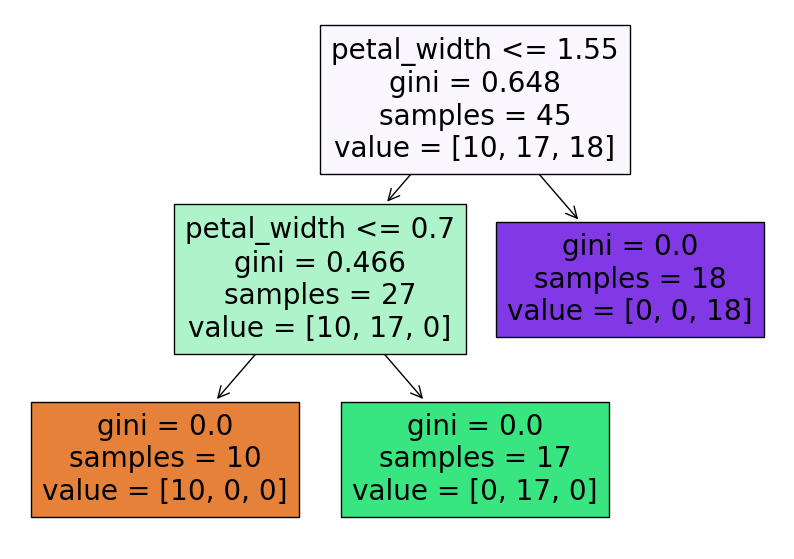

In [55]:
plt.figure(figsize=(10,7))
tree.plot_tree(model, feature_names=["sepal_length","sepal_width","petal_length","petal_width"],filled=True)
plt.show()